In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving n_iceextent.mon.csv to n_iceextent.mon.csv


In [24]:
df=pd.read_csv('n_iceextent.mon.csv')
df.columns

Index(['Date', '  N hemisphere ice extent  missing value -99.99 https://psl.noaa.gov/data/timeseries/month/'], dtype='object')

In [26]:
df.columns=['Date','Extent']



In [27]:
df=df[df['Extent']!=-9999]

In [29]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year+df['Date'].dt.month/12
print(df.head())

         Date  Extent         Year
10 1978-11-01   11.65  1978.916667
11 1978-12-01   13.67  1979.000000
12 1979-01-01   15.41  1979.083333
13 1979-02-01   16.18  1979.166667
14 1979-03-01   16.34  1979.250000


/tmp/ipython-input-29-623167888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])
/tmp/ipython-input-29-623167888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Date'].dt.year+df['Date'].dt.month/12


In [30]:
from sklearn.model_selection import train_test_split
X=df[['Year']]
y=df['Extent']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=lr.predict(X_test)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)

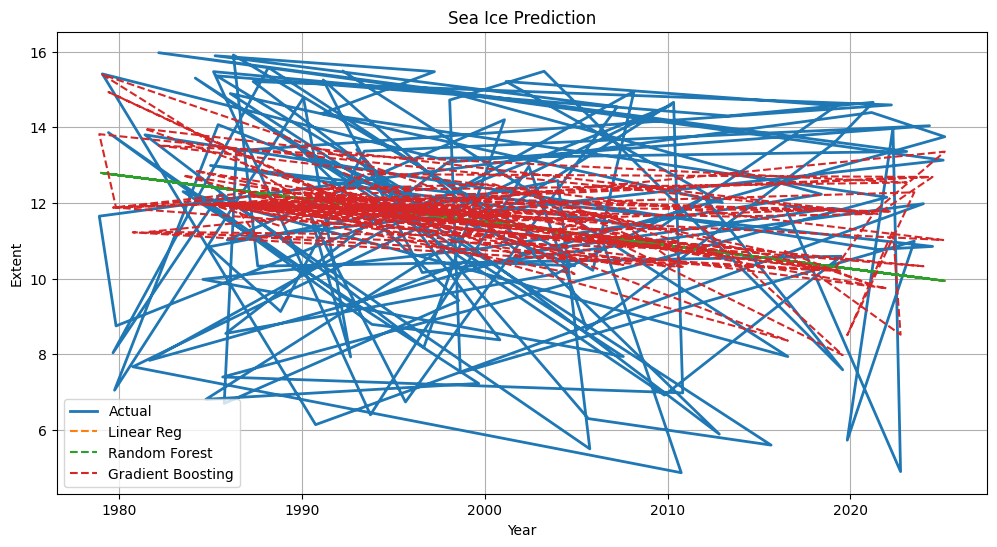

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(X_test, y_test, label='Actual', linewidth=2)
plt.plot(X_test, y_pred_lr, '--', label='Linear Reg')
plt.plot(X_test, y_pred_rf, '--', label='Random Forest')
plt.plot(X_test, y_pred_gb, '--', label='Gradient Boosting')
plt.legend()
plt.title("Sea Ice Prediction")
plt.xlabel("Year")
plt.ylabel("Extent")
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("LR R²:", r2_score(y_test, y_pred_lr))
print("RF R²:", r2_score(y_test, y_pred_rf))
print("GB R²:", r2_score(y_test, y_pred_gb))


LR R²: -0.04911336986439285
RF R²: -0.04911336986439285
GB R²: 0.16985586007810682
